In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

Specify which regulators use

In [ ]:
path = Path('./pyIPSA_PC3_KD_OE/all_rbps/').expanduser()

ilf2 = pd.read_csv(path/'ilf2_exons.csv')
hnrnpu = pd.read_csv(path/'hnrnpu_exons.csv')
rbfox2 = pd.read_csv(path/'rbfox2_exons.csv')
srsf3 = pd.read_csv(path/'srsf3_exons.csv')
ptbp1 = pd.read_csv(path/'ptbp1_exons.csv')
qki = pd.read_csv(path/'qki_exons.csv')
control = pd.read_csv(path/'ut_exons.csv')

all_rbp = pd.concat([ilf2, hnrnpu, rbfox2, srsf3, ptbp1, qki, control], axis=0)

Specify coordinates of cassete exons, which to look for

In [ ]:
exon_4_positions = pd.read_csv('./pyIPSA_PC3/exon_4_coordinates_in_human.csv')
genes = ['CLK1', 'CLK2', 'CLK3', 'CLK4']

Merge tables with cassete exons

In [ ]:
all_rbp['chrom'] = all_rbp['chrom'].astype(str)
all_rbp['strand'] = all_rbp['strand'].astype(str)
exon_4_positions['chr'] = exon_4_positions['chr'].astype(str)
exon_4_positions['strand'] = exon_4_positions['strand'].astype(str)

df_intersect = all_rbp.merge(exon_4_positions[['gene', 'start', 'end', 'strand', 'chr']],  how='left', right_on=['start', 'end', 'strand', 'chr'], left_on=['start_exon', 'end_exon', 'strand', 'chrom'])

df_intersect = df_intersect.dropna()
df_intersect['dPSI'] = df_intersect['-chx_psi'] - df_intersect['+chx_psi'] # Calculate dPSI

Visualisation of significant effects on KD and OE

/var/folders/0z/f5_949pj6mv3z238ns_dy0cm0000gn/T/ipykernel_5892/515929891.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/0z/f5_949pj6mv3z238ns_dy0cm0000gn/T/ipykernel_5892/515929891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/0z/f5_949pj6mv3z238ns_dy0cm0000gn/T/ipykernel_5892/515929891.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/0z/f5_949pj6mv3z238ns_dy0cm0000gn/T/ipykernel_5892/515929891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/0z/f5_949pj6mv3z238ns_dy0cm0000gn/T/ipykernel_5892/

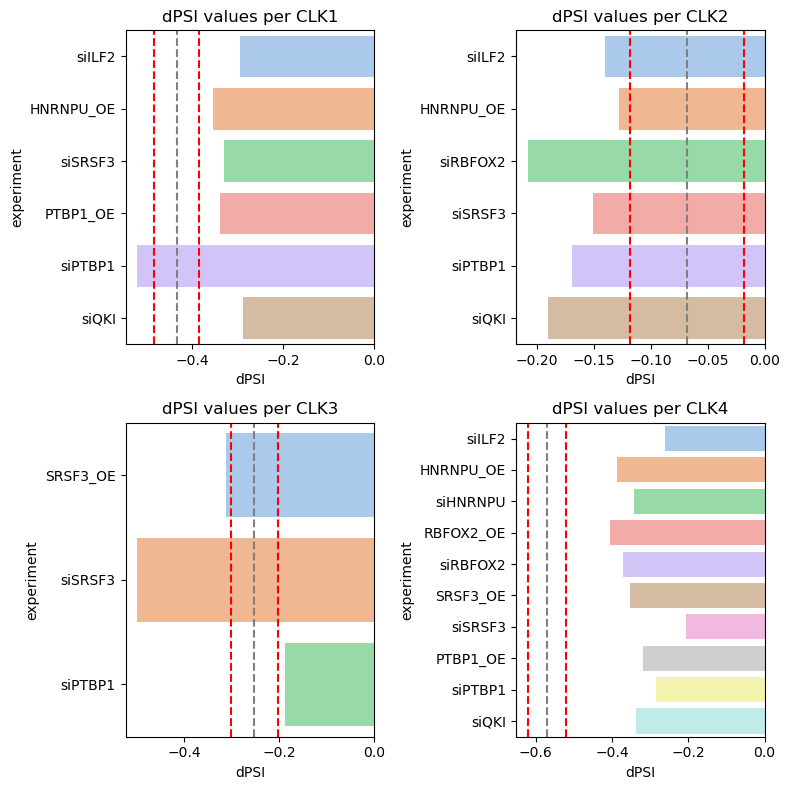

In [ ]:
df_by_gene = {gene: df_intersect[df_intersect['gene'] == gene].copy() for gene in genes}

# Calculate significant dPSI
for gene, df in df_by_gene.items():
    ut_dpsi = df[df['experiment'] == 'UT'].dPSI.iloc[0]
    df['dPSI_significant'] = (df['dPSI'] >= ut_dpsi + 0.05) | (df['dPSI'] <= ut_dpsi - 0.05)
    df_by_gene[gene] = df

# Visualisation
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for (gene, df), (i, j) in zip(df_by_gene.items(), positions):
    ut_dpsi = df[df['experiment'] == 'UT'].dPSI.iloc[0]
    ax = axs[i, j]
    
    sns.barplot(
        y="experiment", x="dPSI",
        data=df[df['dPSI_significant']],
        ci=None, palette='pastel', ax=ax
    )
    
    ax.axvline(x=ut_dpsi, color='gray', linestyle='dashed')
    ax.axvline(x=ut_dpsi + 0.05, color='red', linestyle='dashed')
    ax.axvline(x=ut_dpsi - 0.05, color='red', linestyle='dashed')
    ax.set_title(f'dPSI values per {gene}')

plt.tight_layout()
plt.savefig('./pyIPSA_PC3_KD_OE/all_rbps/dPSI_all_rbp_all_genes.png', bbox_inches='tight')
plt.show()
